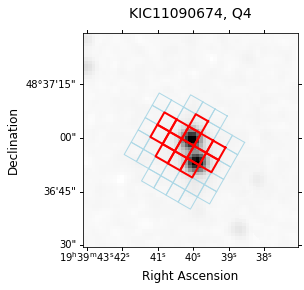

In [15]:
#Original Code from: https://github.com/KeplerGO/lightkurve/issues/14
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_targetpixelfile
from astroquery.skyview import SkyView
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize,PercentileInterval,SqrtStretch

#What to inspect?
kic = 11090674
quarter = 4
tpf = search_targetpixelfile(kic, quarter=quarter).download()

#Requires some wcs projection for the axis
#I get one from the image header that I want to plot pixel locations over
c = SkyCoord(ra=tpf.ra*u.degree, dec=tpf.dec*u.degree, frame='icrs')
images = SkyView.get_images(position=c, survey=['2MASS-J'], radius=1.*u.arcmin)
wcs = WCS(images[0][0].header)

#Get median RA,Dec for each pixel
pixra = np.median(tpf.get_coordinates()[0],axis=0)
pixdec = np.median(tpf.get_coordinates()[1],axis=0)

#Convert RA,DEC to pixel coordinates in image frame
pixels = wcs.wcs_world2pix(pixra*u.degree,pixdec*u.degree,1)
#Reshape for plotting
xy = np.reshape(pixels,(2,pixels[0].size)).T
npixels = len(xy)

#Spacing between pixels is also spacing between corners of pixels
dx = np.median(np.diff(pixels)[0])
dy = np.median(np.diff(pixels)[1])

#Define locations of corners relative to pixel centers
corners = np.array([[1.,1.],[1.,-1.],[-1.,-1.],[-1.,1],[1.,1.]])
offsetmatrix = np.array(((dx,-dy), (dy, dx)))/2.
#There must be a more elegant way to do this...
for i in range(len(corners)):
    corners[i] = np.cross(offsetmatrix,corners[i])

#Which pixels have data or are in mask
# 0 = no data; 1 = data, 2 = mask
d = np.zeros(npixels,dtype=int)
d[np.isfinite(tpf.flux[0]).flatten()] += 1
d[tpf.pipeline_mask.flatten()] += 1
colors = ['None','lightblue','red']
lws = [0,1,2]
zorders = [0,1,2]

#Plot reference image
f = plt.figure(figsize=(4.2,4))
ax = plt.subplot(projection=wcs)
norm = ImageNormalize(images[0][0].data, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
ax.imshow(images[0][0].data,origin='lower',norm=norm,cmap='gray_r')

#Plot boundaries of each pixel
for i in range(npixels):
    ccoords = xy[i]+corners
    ax.plot(ccoords[:,0],ccoords[:,1],c=colors[d[i]],lw=lws[d[i]],zorder=zorders[d[i]])

ax.set_title('KIC'+str(kic)+', Q'+str(quarter),size=14,pad=15)
ax.set_xlabel('Right Ascension',size=12)
ax.set_ylabel('Declination',size=12)
ax.set_aspect(1)
plt.tight_layout(rect=[.22,-.3,1,1.3]) #matplotlib problem
plt.show()

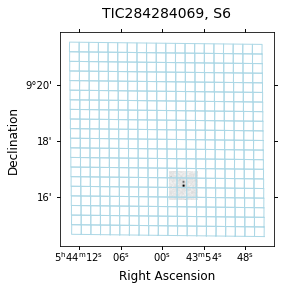

In [3]:
#Target3
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import TessTargetPixelFile, search_targetpixelfile
from astroquery.skyview import SkyView
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize,PercentileInterval,SqrtStretch

#What to inspect?
tic = 284284069
sector = 6
#tpf = search_targetpixelfile(tic, sector=sector).download()
tpf = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=85.9874950438995&dec=9.27339807523853&y=20&x=20&units=px&sector=6')

#Requires some wcs projection for the axis
#I get one from the image header that I want to plot pixel locations over
c = SkyCoord(ra=tpf.ra*u.degree, dec=tpf.dec*u.degree, frame='icrs')
images = SkyView.get_images(position=c, survey=['2MASS-J'], radius=1.*u.arcmin)
wcs = WCS(images[0][0].header)

#Get median RA,Dec for each pixel
pixra = np.median(tpf.get_coordinates()[0],axis=0)
pixdec = np.median(tpf.get_coordinates()[1],axis=0)

#Convert RA,DEC to pixel coordinates in image frame
pixels = wcs.wcs_world2pix(pixra*u.degree,pixdec*u.degree,1)
#Reshape for plotting
xy = np.reshape(pixels,(2,pixels[0].size)).T
npixels = len(xy)

#Spacing between pixels is also spacing between corners of pixels
dx = np.median(np.diff(pixels)[0])
dy = np.median(np.diff(pixels)[1])

#Define locations of corners relative to pixel centers
corners = np.array([[1.,1.],[1.,-1.],[-1.,-1.],[-1.,1],[1.,1.]])
offsetmatrix = np.array(((dx,-dy), (dy, dx)))/2.
#There must be a more elegant way to do this...
for i in range(len(corners)):
    corners[i] = np.cross(offsetmatrix,corners[i])

#Which pixels have data or are in mask
# 0 = no data; 1 = data, 2 = mask
d = np.zeros(npixels,dtype=int)
d[np.isfinite(tpf.flux[0]).flatten()] += 1
d[tpf.pipeline_mask.flatten()] += 1
colors = ['None','lightblue','red']
lws = [0,1,2]
zorders = [0,1,2]

#Plot reference image
f = plt.figure(figsize=(4.2,4))
ax = plt.subplot(projection=wcs)
norm = ImageNormalize(images[0][0].data, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
ax.imshow(images[0][0].data,origin='lower',norm=norm,cmap='gray_r')

#Plot boundaries of each pixel
for i in range(npixels):
    ccoords = xy[i]+corners
    ax.plot(ccoords[:,0],ccoords[:,1],c=colors[d[i]],lw=lws[d[i]],zorder=zorders[d[i]])

ax.set_title('TIC'+str(tic)+', S'+str(sector),size=14,pad=15)
ax.set_xlabel('Right Ascension',size=12)
ax.set_ylabel('Declination',size=12)
ax.set_aspect(1)
plt.tight_layout(rect=[.22,-.3,1,1.3]) #matplotlib problem
plt.show()

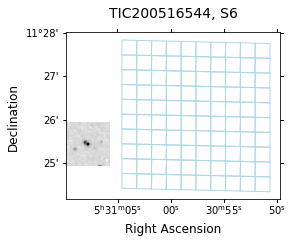

In [4]:
#Target1
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import TessTargetPixelFile, search_targetpixelfile
from astroquery.skyview import SkyView
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize,PercentileInterval,SqrtStretch

#What to inspect?
tic = 200516544
sector = 6
#tpf = search_targetpixelfile(tic, sector=sector).download()
tpf = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=82.7825066008709&dec=11.4239698326563&y=10&x=10&units=px&sector=6')

#Requires some wcs projection for the axis
#I get one from the image header that I want to plot pixel locations over
c = SkyCoord(ra=tpf.ra*u.degree, dec=tpf.dec*u.degree, frame='icrs')
images = SkyView.get_images(position=c, survey=['2MASS-J'], radius=1.*u.arcmin)
wcs = WCS(images[0][0].header)

#Get median RA,Dec for each pixel
pixra = np.median(tpf.get_coordinates()[0],axis=0)
pixdec = np.median(tpf.get_coordinates()[1],axis=0)

#Convert RA,DEC to pixel coordinates in image frame
pixels = wcs.wcs_world2pix(pixra*u.degree,pixdec*u.degree,1)
#Reshape for plotting
xy = np.reshape(pixels,(2,pixels[0].size)).T
npixels = len(xy)

#Spacing between pixels is also spacing between corners of pixels
dx = np.median(np.diff(pixels)[0])
dy = np.median(np.diff(pixels)[1])

#Define locations of corners relative to pixel centers
corners = np.array([[1.,1.],[1.,-1.],[-1.,-1.],[-1.,1],[1.,1.]])
offsetmatrix = np.array(((dx,-dy), (dy, dx)))/2.
#There must be a more elegant way to do this...
for i in range(len(corners)):
    corners[i] = np.cross(offsetmatrix,corners[i])

#Which pixels have data or are in mask
# 0 = no data; 1 = data, 2 = mask
d = np.zeros(npixels,dtype=int)
d[np.isfinite(tpf.flux[0]).flatten()] += 1
d[tpf.pipeline_mask.flatten()] += 1
colors = ['None','lightblue','red']
lws = [0,1,2]
zorders = [0,1,2]

#Plot reference image
f = plt.figure(figsize=(4.2,4))
ax = plt.subplot(projection=wcs)
norm = ImageNormalize(images[0][0].data, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
ax.imshow(images[0][0].data,origin='lower',norm=norm,cmap='gray_r')

#Plot boundaries of each pixel
for i in range(npixels):
    ccoords = xy[i]+corners
    ax.plot(ccoords[:,0],ccoords[:,1],c=colors[d[i]],lw=lws[d[i]],zorder=zorders[d[i]])

ax.set_title('TIC'+str(tic)+', S'+str(sector),size=14,pad=15)
ax.set_xlabel('Right Ascension',size=12)
ax.set_ylabel('Declination',size=12)
ax.set_aspect(1)
plt.tight_layout(rect=[.22,-.3,1,1.3]) #matplotlib problem
plt.show()

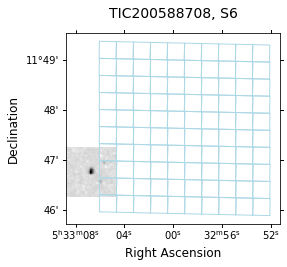

In [5]:
#Target2
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import TessTargetPixelFile, search_targetpixelfile
from astroquery.skyview import SkyView
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize,PercentileInterval,SqrtStretch

#What to inspect?
tic = 200588708
sector = 6
#tpf = search_targetpixelfile(tic, sector=sector).download()
tpf = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=83.2780622977873&dec=11.7793957454409&y=10&x=10&units=px&sector=6')

#Requires some wcs projection for the axis
#I get one from the image header that I want to plot pixel locations over
c = SkyCoord(ra=tpf.ra*u.degree, dec=tpf.dec*u.degree, frame='icrs')
images = SkyView.get_images(position=c, survey=['2MASS-J'], radius=1.*u.arcmin)
wcs = WCS(images[0][0].header)

#Get median RA,Dec for each pixel
pixra = np.median(tpf.get_coordinates()[0],axis=0)
pixdec = np.median(tpf.get_coordinates()[1],axis=0)

#Convert RA,DEC to pixel coordinates in image frame
pixels = wcs.wcs_world2pix(pixra*u.degree,pixdec*u.degree,1)
#Reshape for plotting
xy = np.reshape(pixels,(2,pixels[0].size)).T
npixels = len(xy)

#Spacing between pixels is also spacing between corners of pixels
dx = np.median(np.diff(pixels)[0])
dy = np.median(np.diff(pixels)[1])

#Define locations of corners relative to pixel centers
corners = np.array([[1.,1.],[1.,-1.],[-1.,-1.],[-1.,1],[1.,1.]])
offsetmatrix = np.array(((dx,-dy), (dy, dx)))/2.
#There must be a more elegant way to do this...
for i in range(len(corners)):
    corners[i] = np.cross(offsetmatrix,corners[i])

#Which pixels have data or are in mask
# 0 = no data; 1 = data, 2 = mask
d = np.zeros(npixels,dtype=int)
d[np.isfinite(tpf.flux[0]).flatten()] += 1
d[tpf.pipeline_mask.flatten()] += 1
colors = ['None','lightblue','red']
lws = [0,1,2]
zorders = [0,1,2]

#Plot reference image
f = plt.figure(figsize=(4.2,4))
ax = plt.subplot(projection=wcs)
norm = ImageNormalize(images[0][0].data, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
ax.imshow(images[0][0].data,origin='lower',norm=norm,cmap='gray_r')

#Plot boundaries of each pixel
for i in range(npixels):
    ccoords = xy[i]+corners
    ax.plot(ccoords[:,0],ccoords[:,1],c=colors[d[i]],lw=lws[d[i]],zorder=zorders[d[i]])

ax.set_title('TIC'+str(tic)+', S'+str(sector),size=14,pad=15)
ax.set_xlabel('Right Ascension',size=12)
ax.set_ylabel('Declination',size=12)
ax.set_aspect(1)
plt.tight_layout(rect=[.22,-.3,1,1.3]) #matplotlib problem
plt.show()

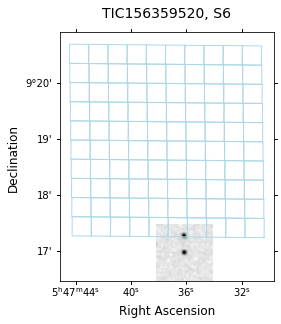

In [6]:
#Target4
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import TessTargetPixelFile, search_targetpixelfile
from astroquery.skyview import SkyView
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize,PercentileInterval,SqrtStretch

#What to inspect?
tic = 156359520
sector = 6
#tpf = search_targetpixelfile(tic, sector=sector).download()
tpf = TessTargetPixelFile('https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=86.900618632173&dec=9.28267284355118&y=10&x=10&units=px&sector=6')

#Requires some wcs projection for the axis
#I get one from the image header that I want to plot pixel locations over
c = SkyCoord(ra=tpf.ra*u.degree, dec=tpf.dec*u.degree, frame='icrs')
images = SkyView.get_images(position=c, survey=['2MASS-J'], radius=1.*u.arcmin)
wcs = WCS(images[0][0].header)

#Get median RA,Dec for each pixel
pixra = np.median(tpf.get_coordinates()[0],axis=0)
pixdec = np.median(tpf.get_coordinates()[1],axis=0)

#Convert RA,DEC to pixel coordinates in image frame
pixels = wcs.wcs_world2pix(pixra*u.degree,pixdec*u.degree,1)
#Reshape for plotting
xy = np.reshape(pixels,(2,pixels[0].size)).T
npixels = len(xy)

#Spacing between pixels is also spacing between corners of pixels
dx = np.median(np.diff(pixels)[0])
dy = np.median(np.diff(pixels)[1])

#Define locations of corners relative to pixel centers
corners = np.array([[1.,1.],[1.,-1.],[-1.,-1.],[-1.,1],[1.,1.]])
offsetmatrix = np.array(((dx,-dy), (dy, dx)))/2.
#There must be a more elegant way to do this...
for i in range(len(corners)):
    corners[i] = np.cross(offsetmatrix,corners[i])

#Which pixels have data or are in mask
# 0 = no data; 1 = data, 2 = mask
d = np.zeros(npixels,dtype=int)
d[np.isfinite(tpf.flux[0]).flatten()] += 1
d[tpf.pipeline_mask.flatten()] += 1
colors = ['None','lightblue','red']
lws = [0,1,2]
zorders = [0,1,2]

#Plot reference image
f = plt.figure(figsize=(4.2,4))
ax = plt.subplot(projection=wcs)
norm = ImageNormalize(images[0][0].data, interval=PercentileInterval(99.9),
                      stretch=SqrtStretch())
ax.imshow(images[0][0].data,origin='lower',norm=norm,cmap='gray_r')

#Plot boundaries of each pixel
for i in range(npixels):
    ccoords = xy[i]+corners
    ax.plot(ccoords[:,0],ccoords[:,1],c=colors[d[i]],lw=lws[d[i]],zorder=zorders[d[i]])

ax.set_title('TIC'+str(tic)+', S'+str(sector),size=14,pad=15)
ax.set_xlabel('Right Ascension',size=12)
ax.set_ylabel('Declination',size=12)
ax.set_aspect(1)
plt.tight_layout(rect=[.22,-.3,1,1.3]) #matplotlib problem
plt.show()